In [5]:
## %matplotlib inline

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from scipy.optimize import minimize


# Manufacturing Scrap Management of Gypsum Plasterboards


## Content
1. Abstract
2. Introduction
3. Objectives
4. Methodology

## 1. Abstract
This project investigates the generation, behaviour, and reduction strategies of manufacturing scrap in the production of gypsum plasterboards. By leveraging a multidisciplinary mathematical framework, the project aims to construct an analytical model for identifying process inefficiencies, quantifying waste, and simulating corrective measures. The outcomes are intended to support decision-making processes in sustainable manufacturing, enhance process capability, and reduce material and economic losses.


## 2. Introduction
In the domain of industrial manufacturing, the efficient use of raw materials is both an economic and environmental imperative.A recurring issue in this industry is the generation of manufacturing scrap, which can arise from edge trimming, defects in recipe, over-drying, equipment malfunction, or human error. This scrap not only represents a direct material loss, but also contributes to increased energy consumption, higher production costs, and carbon emissions, thereby posing a multifaceted challenge to sustainability and productivity.

Despite automation and process standardization, scrap levels can exhibit high variability and often follow non-obvious statistical patterns influenced by multiple interacting variables. Traditional approaches to scrap reduction tend to rely on heuristic rules or periodic audits, which may overlook deeper mathematical relationships embedded in production data. There is a growing need to apply a rigorous, quantitative framework to understand, predict, and ultimately control scrap generation with greater precision.

This project addresses that gap by employing a suite of mathematical tools in a scientific and structured manner. The goal is not only to uncover the latent patterns behind scrap production, but also to build prescriptive models that can inform data-driven interventions.

The project is aligned with principles of Industry 4.0 and sustainable manufacturing. The outcomes of this work are intended to support process engineers, quality control analysts, and sustainability managers in making informed, quantitative decisions that improve both productivity and environmental performance.

Project Deliverables:
1. Descriptive Statistics Summary
2. Distribution Analysis
3. Categorical Breakdown
4. Linear modelling
5. Regression model with optimization algorithm

## 3. Objectives
### 3.1 Quantitative Characterization of Scrap
The purpose of Quantitative Characterization is to establish a foundational understanding of how, when, and where scrap is generated in the manufacturing process. It serves as the first diagnostic layer in a data-driven investigation and is crucial for guiding all subsequent analysis, including statistical modelling, hypothesis testing, and optimization.

First, the data needs to be collected from various sources - manually or automatically from sensors, various software products, PLCs.
 - Process Data: Collect data on production rates, machine settings, and environmental conditions.
 - Scrap Data: Record quantities and types of scrap, along with timestamps and associated process parameters.

Second, it needs to be defined how the scrap is creating. As the manufacturing is dynamic, the performance may vary by different factors. That's why the total and relative quantities of different types of manufacturing scrap (e.g., edge trim, cracked, water-damaged) needs to be defined and calculated.

Third, statistical analysis should be performed. This is necessary to understand the basic characteristics of the scrap and its distributional properties (mean, median, mode, skewness, kurtosis) of scrap. Recognizing variability is essential for targeting root causes and ensuring that control strategies are not overly generalized.

### 3.2 Mathematical Modelling
In manufacturing, raw observations and operational data are rarely sufficient to understand, predict, or optimize performance. A mathematical model serves as an abstract yet precise representation of the real production process. The process could be described using various mathematical techniques such as linear algebra and calculus.


## 4. Methodology
### 4.1 Quantitative Characterization of Scrap

#### 4.1.1 Data collecting
Process parameters - SCADA/PLC - Automatically

Material properties - Suppliers, lab tests - Manually

Environmental Variables - Not considered

Human and Shift Factors - Visual inspection checklists, Operator shift logs - Manually

Machinery - Maintenance activity and downtime logs/ reports - Manually

Scrap and Defect Outcomes - Manually imported reports into BDE system


*The process could be automated with computer vision technics and robotics.*

#### 4.1.2 Manufacturing scrap 


#### Types

| **Scrap Type**            | **Description**                                                                 | **Causes**                                     |
|---------------------------|----------------------------------------------------------------------------------|------------------------------------------------|
| **Delamination**          | Paper detaches from gypsum core                                                 | Improper bonding, low water content            |
| **Edge Cracks**           | Cracks along sides of the board                                                 | Excess drying, weak slurry mix, mechanical impact |
| **Thickness Variation**   | Board too thick or thin beyond tolerance                                        | Poor mixer control, press malfunctions         |
| **Surface Bubbles**       | Visible voids or blisters                                                       | Trapped air, incorrect foaming agent ratio     |
| **Paper Tears/Wrinkles**  | Paper surface damaged or improperly aligned                                     | Feeding mechanism faults, wet spots            |
| **Undercured Boards**     | Board too soft or crumbling                                                     | Insufficient drying or chemical imbalance      |
| **Overburnt Boards**      | Board becomes brittle or warped due to overheating                              | Excess dryer temperature or time               |
| **Miscalculated Cuts**    | Incorrect board lengths or broken ends                                          | Knife malfunction or timing errors             |
| **Startup Scrap**         | Defective boards at the beginning of a batch                                    | Temperature instability, unbalanced mix        |




#### Absolute Scrap Logging

Example of provided report

Date       | Scrap Type        | Quantity (m2) | Boards Count | Cause
-----------|-------------------|---------------|---------------|--------------------------
2025-04-01 | Delamination       | 320           | 240           | Bonding agent error
2025-04-01 | Edge Cracks        | 180           | 135           | Line speed too high
2025-04-01 | Misalignment Cut   | 90            | 75            | Sensor fault




#### Relative Share Calculation
Relative share of each type should be calculated by the following formula:

$$
\begin{equation}
\text{Relative Share (\%)} = \left( \frac{\text{Scrap Type Quantity}}{\text{Total Scrap Quantity}} \right) \times 100
\tag{4.1.2-1}
\end{equation}
$$



#### Descriptive Statistics
**Arithmetic Mean**

The average amount of scrap per observation/day/week/month.


\begin{equation}
\bar{x} = \frac{1}{n} \sum_{i=1}^{n} x_i
\tag{4.1.2-4}
\end{equation}

where:

𝑥 is the recorded scrap measurements (e.g., kg of scrap per batch or per day),

𝑛 is the total number of observations.


**Standard Deviation**

*Typical deviation from the average daily/weekly/monthly/yearly scrap rate.*


\begin{equation}
\text{s} = \sqrt{\frac{1}{n} \sum_{i=1}^{n} (x_i - \bar{x})^2}
\tag{4.1.2-6}
\end{equation}


**Coefficient of Variation (CV)**

*Standard deviation relative to the mean — useful for comparing variability between different types of scrap or processes.*


\begin{equation}
\text{CV} =  \frac{\text{s}}{{\bar{x}}} \times 100
\tag{4.1.2-7}
\end{equation}


In [104]:

df_types = pd.read_csv('scrap_data.csv', sep=';')



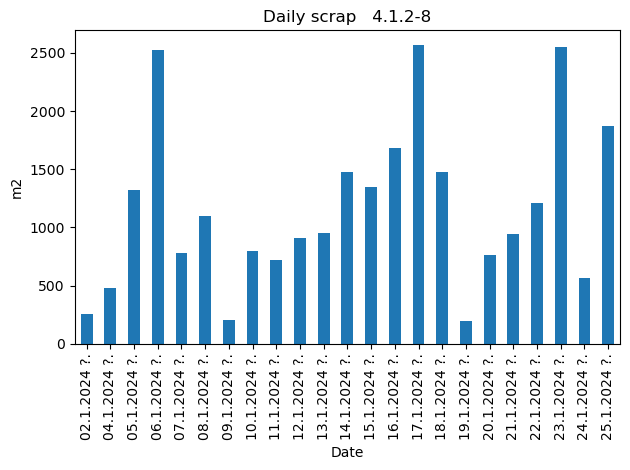

In [16]:
# Plot produced scrap per days
m2_days = df_types.groupby('Posting data')['m2'].sum().sort_index()
m2_days.plot(kind='bar')
plt.title ("Daily scrap   4.1.2-8")
plt.xlabel("Date")
plt.ylabel("m2")
plt.tight_layout()
plt.show()


count      23.000000
mean     1160.695652
std       709.166519
min       199.700000
25%       740.800000
50%       954.000000
75%      1477.250000
max      2565.300000
Name: m2, dtype: float64
Skewness     0.7304394703310757
Kurtosis     -0.09896122180550915


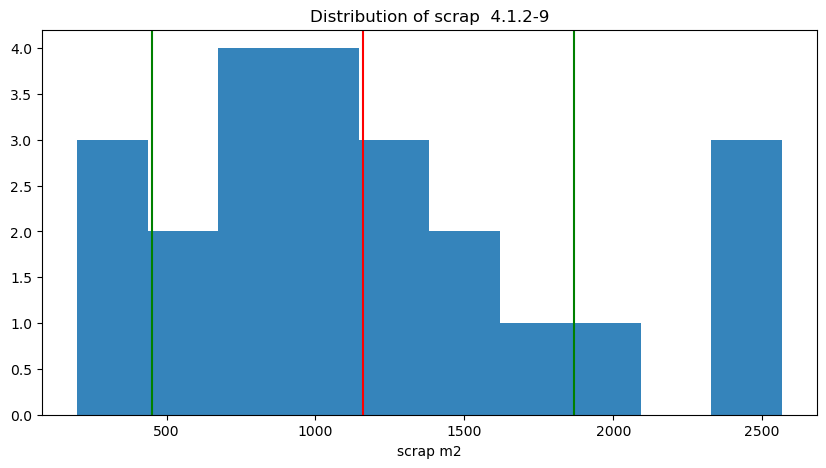

In [55]:
#Descriptive Statistic
description = m2_days.describe().T
mean = m2_days.mean()
var = m2_days.var()
sdev = m2_days.std()
skew = m2_days.skew()
kurt = m2_days.kurt()


print(description)
print("Skewness    ", skew)
print("Kurtosis    ", kurt)


#Plot the distribution
plt.figure(figsize=(10,5))
plt.hist([m2_days], alpha = 0.9, histtype="bar", bins = 10)
plt.axvline(mean, c = "red")
plt.axvline(mean - sdev, c = "green")
plt.axvline(mean + sdev, c = "green")
plt.title("Distribution of scrap  4.1.2-9")
plt.xlabel("scrap m2")


plt.show()

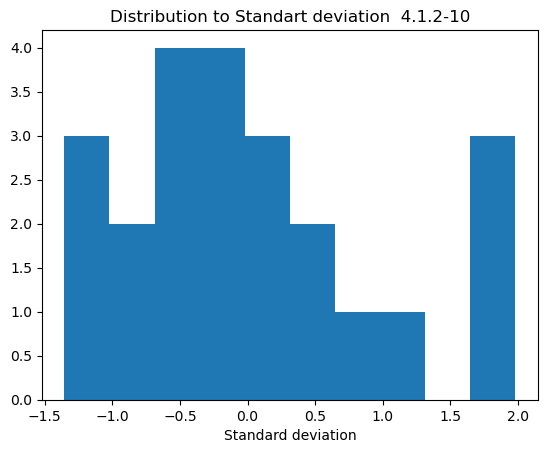

In [19]:
# Plot STD graph
transformed = (m2_days - mean)/ sdev
plt.hist(transformed)
plt.xlabel("Standard deviation")
plt.title("Distribution to Standart deviation  4.1.2-10")
plt.show()

In [88]:
#Finding the outlier
grouped = df_types.groupby('Posting data')['m2'].sum()
outlier_dates = grouped[grouped > 2000].index

#Filter and group the data
outliers = df_types[df_types['Posting data'].isin(outlier_dates)][['Reason text','m2']]
scrap_by_reason = outliers.groupby('Reason text')['m2'].sum().sort_values(ascending=False)


print(scrap_by_reason)

Reason text
Product change (flying changeover)       4109.8
Run up / shut down (prod start / end)    2250.0
Other mechanical problems                 790.1
Paper change                              244.7
Other reasons (with comment!)             243.2
Name: m2, dtype: float64


Assumptions:

1. The majority of daily scrap volumes cluster around the mean of approximately 1000 m²/day, indicating relatively stable process behaviour. Most values fall within ±1 standard deviation, suggesting consistency in production with few deviations. A few spikes were observed. These anomalies should be subject to root cause analysis to identify underlying operational or mechanical issues.
2. The distribution exhibits a positive skewness of 0.73, reflecting a long right tail. This indicates that while most days produce moderate scrap levels, there are occasional days with significantly elevated scrap, contributing to the tail. These high-scrap days are statistically less frequent but operationally critical and should be analyzed in detail.
3. The kurtosis value of -0.9 indicates a platykurtic distribution, meaning the data has lighter tails and a flatter peak than a normal distribution. This supports the observation that the majority of the data points are spread more evenly around the mean, and the distribution is not heavily concentrated in the centre.
4. Figure 4.1.2-8 shows the normal operating scrap range appears to be between 500 and 1500 m²/day. This range encompasses the majority of observed values and can be treated as a baseline for performance monitoring. Days with scrap volumes exceeding 2000 m² are statistically infrequent and can be considered outliers, signalling potential process disturbances or inefficiencies.
5. Outliers are caused by mostly by product change and shut down. They should be significantly optimized.




In [94]:

# Count of each Scrap reason
df_types['Reason'] = df_types['Reason'].astype(str)
type_counts = df_types['Reason'].value_counts()
m2_totals = df_types.groupby('Reason')['m2'].sum()


# Calculate relative share as percentage
type_share = (m2_totals / m2_totals.sum()) * 100

# Creating new data frame
type_share_df = type_share.reset_index()
type_share_df.columns = ['Reason', 'Relative Share (%)']
type_share_df['Reason'] = type_share_df['Reason'].astype(str)
reason_texts = df_types[['Reason', 'Reason text']].drop_duplicates(subset='Reason')
reason_texts['Reason'] = reason_texts['Reason'].astype(str)
type_share_df = type_share_df.merge(reason_texts, on='Reason', how='left')
type_share_df = type_share_df.merge(m2_totals, on='Reason', how='left')
type_share_df['Count'] = type_share_df['Reason'].map(type_counts) # add count column
type_share_df['m2'] = type_share_df['Reason'].map(m2_totals)

type_share_df = type_share_df[['Reason', 'Reason text','Count', 'Relative Share (%)', 'm2']] #sort the columns


#unit_counts = df_types["Qyantity"].sum() 
#total_scrap = df_types["m2"].sum()
#Scrap_unit = total_scrap/ unit_counts * 100

#Calculate coeficient of variation

mean = type_share_df.m2.mean()
sdev = type_share_df.m2.std()

cv = sdev/ mean * 100


print(f"Coefficient of Variation {cv:.2f} %")


Coefficient of Variation 118.94 %


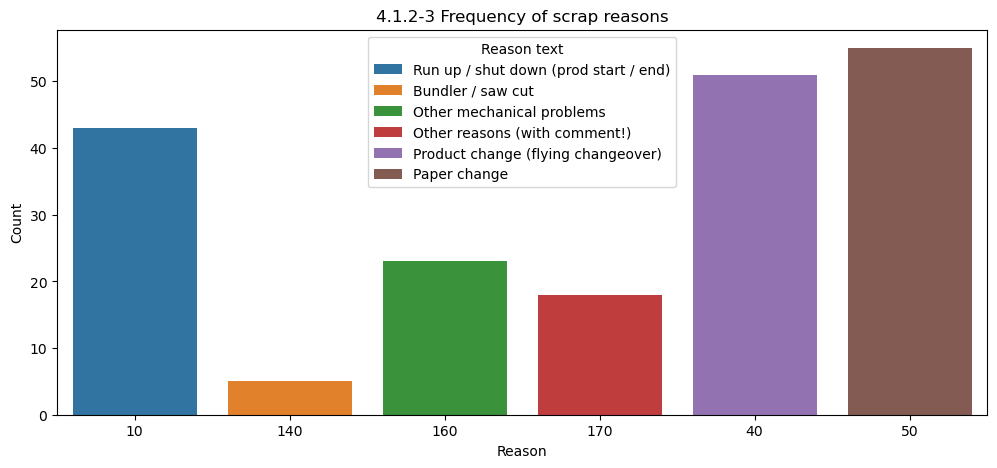

In [96]:
#Plot scrap reasons
plt.figure(figsize=(12,5))
table3 = sns.barplot(x="Reason", y="Count",hue ="Reason text",  data=type_share_df)
table3.set_title("4.1.2-3 Frequency of scrap reasons")
plt.show()

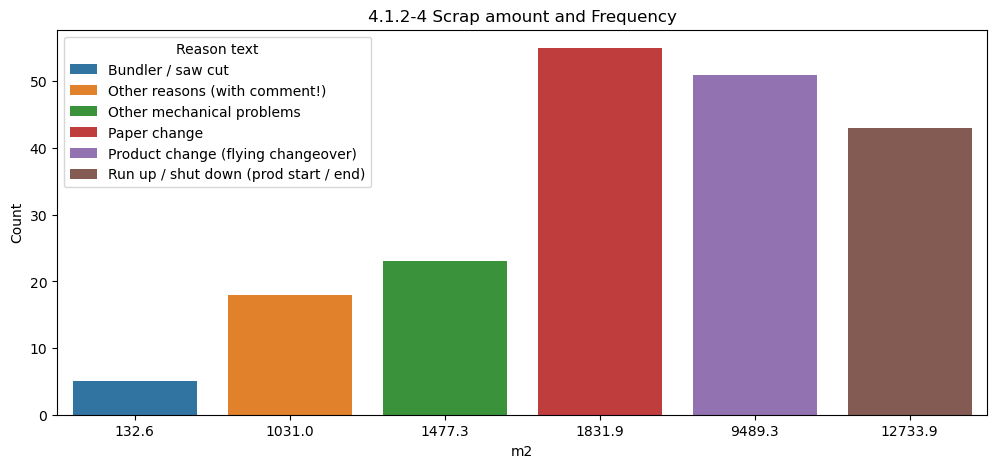

In [98]:
#Plot scrap amoun
plt.figure(figsize=(12,5))
table4 = sns.barplot(x="m2", y='Count',hue ="Reason text",  data=type_share_df)
table4.set_title("4.1.2-4 Scrap amount and Frequency")
plt.show()

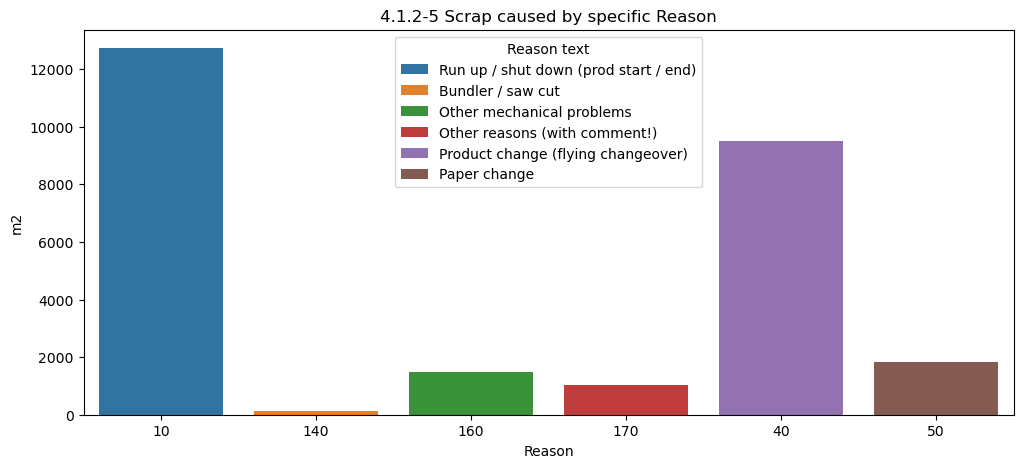

In [24]:
#Plot scrap amount caused by a reason
plt.figure(figsize=(12,5))
table5 = sns.barplot(x="Reason", y='m2',hue ="Reason text",  data=type_share_df)
table5.set_title("4.1.2-5 Scrap caused by specific Reason")
plt.show()

# Assumptions:

1. The Coefficient of Variation (CV) is 118.94%, indicating extremely high variability in the scrap data. This suggests that while the majority of reasons contribute to relatively low scrap volumes, a few causes result in disproportionately high scrap rates. These high-impact causes warrant deeper root-cause analysis and prioritization in corrective actions.

3. Visualizations in Figures 4.1.2-3 4.1.2-4 and 4.1.2-5 reveal that the majority of scrap arises from shutdowns and product changeovers. While product changes are an inherent part of flexible manufacturing, their frequency and execution could likely be optimized to reduce associated waste. Shutdowns may be attributed to factors such as unplanned maintenance, workforce issues, or procedural inefficiencies. These should be systematically monitored and addressed through data-driven root cause analysis.

### 4.2 Mathematical Modelling

Scrap generation is influenced by multiple interdependent variables—such as line speed, raw‑board moisture, gypsum slurry consistency, pressing temperature, and equipment wear. A purely empirical or purely physics‑based method alone cannot capture the full complexity of these interactions. Instead, a hybrid approach—combining data‑driven regression modelling with constrained numerical optimization (e.g., SLSQP)—provides both insight into drivers of scrap and a prescriptive method to find optimal operating set points under real‑world constraints.


#### 4.2.1 Regression Modelling: Predicting Scrap from Data

Regression modelling uses historical production data to quantify relationships between scrap and its predictors. The magnitude and sign of each coefficient $\alpha_i$ tells how strongly and in which direction each input influences scrap. After fitting, model accuracy is evaluated by the coefficient of determination 
$𝑅^2$, which ranges up to 1.0

Limitations of the method:
1. Regression does not enforce process bounds. If a current parameter is negative, pure regression would suggest “increase it” to minimize scrap—an impossible or unsafe outcome.
2. If historical data never covered extreme combinations (e.g., very high speed with very low moisture), the model can make unreliable predictions.
3. Regression analyse the historical data (parameters, coefficients) based on the produced scrap, but it does not automatically produce the exact settings that achieve minimal scrap under real constraints.

The Model is a mathematical representation of how different factors (inputs) influence scrap generation.



$$S = \alpha_1 P 
  + \alpha_2 \left( \sum_{i=1}^{M} D_i \right)
  + \alpha_3 \left( \sum_{i=1}^{M} (1 - Q_i) \right)
  + \alpha_4 C
  + \alpha_5 \left( \sum_{i=1}^{M} (1 - E_i) \right)
  + \alpha_6 T
  + \alpha_7 A
  + \alpha_8 \left( \frac{B}{P} \right)
  + \varepsilon
\tag{4.3.1-1}$$


where:

$\alpha_1, \alpha_2, \ldots, \alpha_8$: Coefficients (weights) showing how much each factor contributes to scrap.

$P$: Total production volume (e.g., number of boards or meters of plasterboard).

$M$: Number of machines or production lines.

$D_i$: Downtime of machine $i$ (hours/day).

$Q_i$: Quality index of machine $i$ ($0 \leq Q_i \leq 1$).

$E_i$: Efficiency of operator on machine $i$ ($0 \leq E_i \leq 1$).

$C$: Changeover frequency (number of product switches per day).

$T$: Temperature or other environmental factor (optional, if known to affect scrap).

$A$: Age of equipment (could be linear or categorical).

$B$: Batch size.

$\varepsilon \in \mathbb{R}$: Error term (residual, to account for noise).

Explanaition:

$\alpha_1 P$
Scrap increases with total production due to scale.

$\alpha_2 \sum D_i$
More downtime may increase startup scrap or quality issues.

$\alpha_3 \sum (1 - Q_i)$
Poor machine quality leads to more defective products. Represents losses due to machine performance issues (vibration, mechanical failure, misalignment).

$\alpha_4 C$
Frequent changeovers can cause off-spec scrap.

$\alpha_5 \sum (1 - E_i)$
Less skilled operators increase error likelihood.

$\alpha_6 T$
Environmental conditions (e.g., temp/humidity) can affect curing or bonding.

$\alpha_7 A$
Older machines may have more maintenance issues, leading to defects.

$\alpha_8 \frac{B}{P}$
Small batch sizes increase the impact of setup waste.

$\varepsilon$
The residual error accounts for factors not captured by the model (e.g., unmeasured variability, randomness).


4.3.2 Constrained Optimization (SLSQP): Finding Optimal Set points


The fitted regression defines an objective function for optimization. SLSQP, a gradient-based constrained minimizer, to find process settings that minimize predicted scrap. SLSQP handles bounded and equality/inequality constraints, allowing to impose realistic bounds on each variable and ensure a minimum output rate. The objective is simply the regression prediction of scrap for given settings. The optimization variables include all input parameters (e.g. speed, temperature, etc.), subject to physical bounds.

SLSQP method: it replaces the original problem with a sequence of Quadratic Problems (QP) whose objective are second-order approximations of the Lagrangian and whose constraints are the linearized original constraints. It then uses globalization techniques to guarantee convergence whatever the initial point.

Intercept: 9.166299456814784
Coefficients:
{'P': 0.19961286399859265, 'D': 4.450237460862028, 'Q': 57.059386606610005, 'C': 9.32505889500541, 'E': 37.445772731441735, 'T': 0.16331419327580618, 'A': 4.818113453481867, 'R': 1.2617640794026086}
Predicted scrap: 359.067 m2
R^2 = 0.994


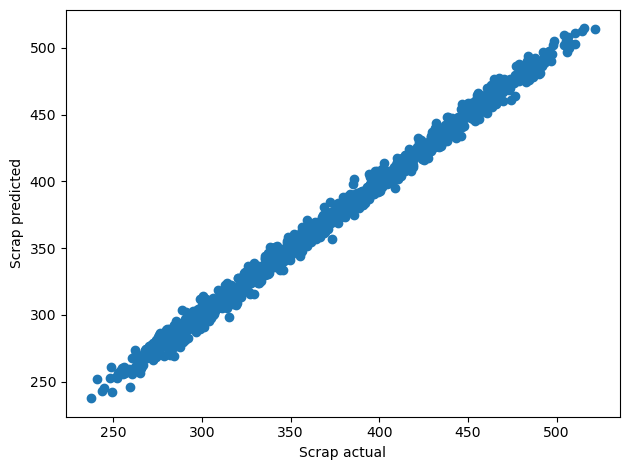

In [30]:


# Set random seed for reproducibility
np.random.seed(42)

n_samples = 1000

# Generate random samples
P = np.random.uniform(900, 2000, n_samples)         # Production volume (m²)
D = np.random.uniform(0.5, 1.0, n_samples)          # Downtime (hrs)
Q = np.random.uniform(0.05, 0.12, n_samples)        # Defect rate
C = np.random.uniform(1, 5, n_samples)              # Changeovers (integer)
E = np.random.uniform(0.05, 0.15, n_samples)        # Operator error rate
T = np.random.uniform(20, 30, n_samples)            # Temperature (°C)
A = np.random.uniform(2, 8, n_samples)              # Age (years)
B = np.random.uniform(150, 250, n_samples)          # Batch size
R = P/B                                             # Batch ratio

#  Scrap (m²) as function - replace with real data to get real coefs
scrap = (10 + 0.2*P + 2.1*D + 48.2*Q + 9.5*C + 39.0*E + 0.2*T + 4.7*A + 1.3*R)
#scrap = (10 + P + D + Q + C + E + T + A + R)
scrap += np.random.normal(0,5,n_samples)  # add noise


# Create DataFrame
df = pd.DataFrame({
    "P": P,
    "D": D,
    "Q": Q,
    "C": C,
    "E": E,
    "T": T,
    "A": A,
    "B": B,
    "R": R,
    "Scrap": scrap,
})



X = df[['P', 'D', 'Q', 'C', 'E', 'T', 'A', 'R']]
y = df['Scrap']

#print(df)

# linear regression
model = LinearRegression().fit(X, y)


# Get coefficients
coefs = dict(zip(X.columns, model.coef_))
intercept = model.intercept_
scrap_predicted = model.predict(X)[0]
y_predicted = model.predict(X)
r2 = r2_score(y, y_predicted)

print("Intercept:", intercept) # a0
print("Coefficients:")
print(coefs)
print(f"Predicted scrap: {scrap_predicted:.3f} m2")
print(f"R^2 = {r2:.3f}")

plt.scatter(y, y_predicted)
plt.xlabel("Scrap actual")
plt.ylabel("Scrap predicted")
plt.tight_layout()
plt.show()



In [100]:

# Cost ( Objective) function
def scrap_func(x):
    # Unpack the input vector
    P, D, Q, C, E, T, A, R = x
    
    return (intercept 
            + coefs["P"] * P
            + coefs["D"] * D
            + coefs["Q"] * Q
            + coefs["C"] * C
            + coefs["E"] * E
            + coefs["T"] * 
            + coefs["A"] * A
            + coefs["R"] * R
            )




# Constraints:Q
constraints = [
   # {'type': 'eq', 'fun': lambda x: x[0] - 1000},         # P = 1000
    {'type': 'ineq', 'fun': lambda x: 0.08 - x[2]}        # Q ≤ 0.08
]


# Variable bounds ( recommended for stability)
# P and T are used as constraints
bounds = [
    (1000, 1000),   # P fixed at 1000 used like constraints
    (20, 100),       # D
    (0.01, 1),         # Q (quality defect rate)
    (1, 20),        # C
    (0.01, 1),         # E
    (22, 22),      # T
    (0, 30),        # A
    (4, 6.67)         # R
]

# Initial guess
x0 = [1500, 2.0, 0.05, 4, 0.05, 25, 5, 5]

# Run optimization
optimization = minimize(scrap_func, x0, constraints=constraints, bounds=bounds, method='SLSQP')


# Results
if optimization.success:
    var_names = ['P', 'D', 'Q', 'C', 'E', 'T', 'A', 'R']
    print("Optimal Values:")
    for name, val in zip(var_names, optimization.x):
        print(f"  {name} = {val:.4f}")
    print(f"\nMinimum Scrap = {optimization.fun:.4f}")
else:
    print("Optimization failed:", optimization.message)





Optimal Values:
  P = 1000.0000
  D = 20.0000
  Q = 0.0100
  C = 1.0000
  E = 0.0100
  T = 22.0000
  A = 0.0000
  R = 4.0000

Minimum Scrap = 316.6940


Assumptions:
1. The regression model achieves an $R^2$ value of 0.994, indicating a very strong fit. This suggests that the model captures nearly all of the variability in the scrap based on the process parameters. Parameters with higher absolute coefficient values are likely to have greater impact on the predicted scrap.
2. The optimization indicates that adjusting certain process parameters can reduce the predicted scrap rate. Because the predictive model is linear, the direction of parameter influence is straightforward—parameters with positive coefficients tend to increase scrap when increased.